# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     691.5
Date:                Sat, 06 May 2023   Prob (F-statistic):           2.96e-38
Time:                        22:39:49   Log-Likelihood:                -6.2986
No. Observations:                  50   AIC:                             20.60
Df Residuals:                      46   BIC:                             28.25
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9682      0.098     50.941      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.4579622   4.94258458  5.38765931  5.7658194   6.05957446  6.26418435
  6.38843792  6.45320904  6.48802713  6.52622548  6.59946477  6.73253123
  6.93926439  7.22028326  7.56288464  7.9431302   8.3297795   8.68942269
  8.99196968  9.21559382  9.35031799  9.39965378  9.38002458  9.31806725
  9.24625574  9.19756575  9.20005687  9.27226251  9.42014489  9.63611547
  9.90028174 10.18371547 10.45320556 10.67671454 10.82864219 10.89403166
 10.87102674 10.77117693 10.61753982 10.44089281 10.27467648 10.14950042
 10.08811409 10.10166923 10.1878876  10.33143533 10.50644219 10.68075204
 10.82120596 10.89909018]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.88158119 10.73131217 10.46797572 10.13644879  9.79580526  9.50485252
  9.30773348  9.22311874  9.23963545  9.31865175]


## Plot comparison

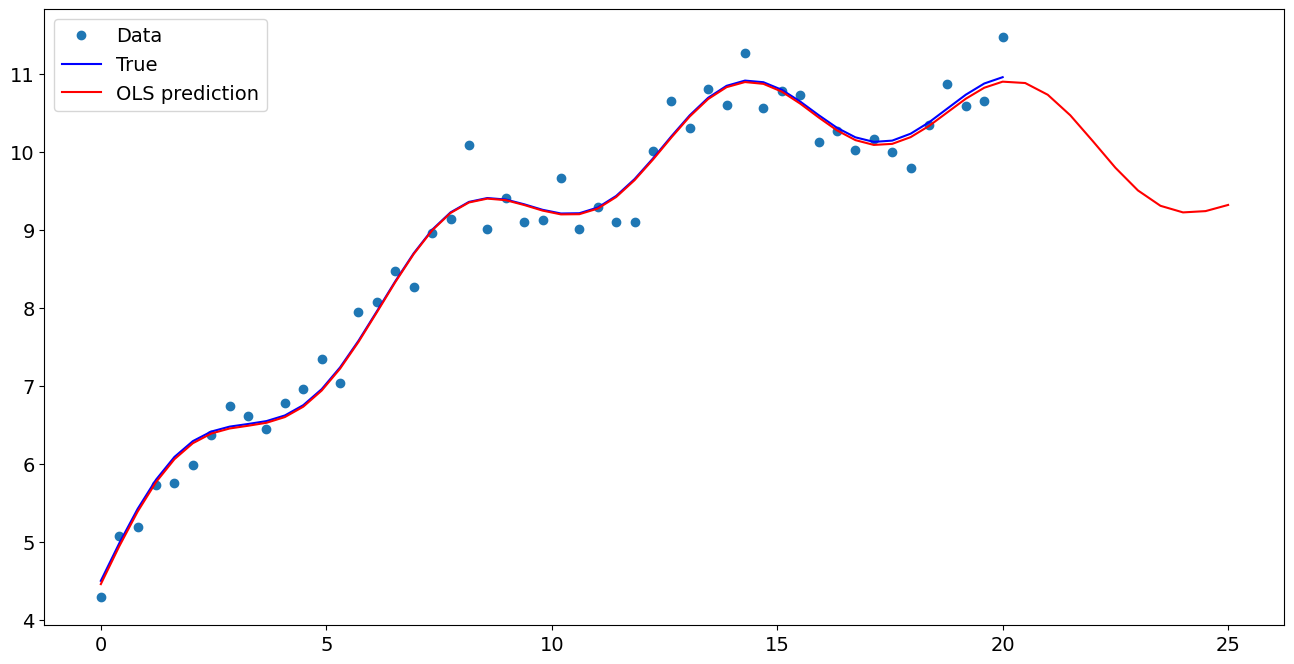

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.968204
x1                  0.503231
np.sin(x1)          0.502155
I((x1 - 5) ** 2)   -0.020410
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.881581
1    10.731312
2    10.467976
3    10.136449
4     9.795805
5     9.504853
6     9.307733
7     9.223119
8     9.239635
9     9.318652
dtype: float64